   *                          Social Sentiments Unveiled:
   *             Harnessing Twitter Data for Comprehensive Sentiment Analysis"


* Problem Statement:

Developing an Advanced Sentiment Analysis Model for Real-time Twitter Data to Decode Public Sentiments and Propel Informed Decision-Making

* Description:

In the age of social media dominance, understanding public sentiments is paramount for organizations seeking to stay ahead of the curve. The Twitter_Data dataset provides a rich source of real-time tweets, encompassing diverse topics, brands, and social issues. However, analyzing this vast amount of data manually is impractical and time-consuming. Thus, the need arises for an advanced sentiment analysis model capable of extracting valuable insights from the dataset.

The objective of this project is to leverage the Twitter_Data dataset and develop an innovative sentiment analysis model that can accurately classify tweets into positive, negative, or neutral sentiments. By automating sentiment analysis, businesses can unlock a multitude of benefits. They can gauge customer satisfaction, monitor brand reputation, identify emerging trends, and gain a competitive edge in the market. Moreover, this analysis will empower organizations to proactively respond to customer feedback, uncover potential risks, and seize new opportunities.

By delving into the hidden sentiments of Twitter users, this project aims to provide organizations with a comprehensive understanding of public perceptions, enabling them to make data-driven decisions, optimize marketing strategies, improve customer experiences, and cultivate stronger relationships with their target audience. Ultimately, this sentiment analysis endeavor will pave the way for enhanced brand management, robust market insights, and a competitive advantage in today's ever-evolving social media landscape.

*   The dataset:

The Twitter_Data dataset used in this project is sourced from Kaggle, a popular platform for data science and machine learning resources. The dataset is provided by Saurabh Shahane, who is the owner and creator of the dataset. The dataset comprises a collection of tweets gathered from Twitter, a prominent social media platform. The data is diverse and covers various topics, allowing for a comprehensive analysis of sentiments expressed by Twitter users.

The Twitter Sentiment Dataset used in this analysis contains a collection of tweets collected from the Twitter platform. The dataset consists of approximately 162,980 rows and 2 columns: "clean_text" representing the text content of the tweets and "category" indicating the sentiment label associated with each tweet (-1 for negative, 0 for neutral, and 1 for positive). The dataset offers a diverse range of tweets covering various topics and provides an opportunity to analyze and understand the sentiment expressed by Twitter users. It can be a valuable resource for sentiment analysis tasks, machine learning model training, and gaining insights into public opinion on different subjects. The dataset can be accessed from the following link: Twitter Sentiment Dataset.The dataset can be accessed and downloaded from the following link: https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset/code?resource=download

                                        #####################################
                                        #                 EDA               #
                                        #####################################

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clean_text,category.csv')

In [3]:
df.shape

(162980, 2)

In [4]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.describe(include='all')

,clean_text,category
count,162976,162973.000000
unique,162975,NaN
top,assam now positioned strongly indias map with ...,NaN
freq,2,NaN
mean,NaN,0.225436
std,NaN,0.781279
min,NaN,-1.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [6]:
df.index

RangeIndex(start=0, stop=162980, step=1)

In [7]:
df.all

<bound method NDFrame._add_numeric_operations.<locals>.all of                                                clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]>

In [8]:
print(df.dtypes)


clean_text     object
category      float64
dtype: object


In [9]:
sentiment_counts = df['category'].value_counts()
print(sentiment_counts)


category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64


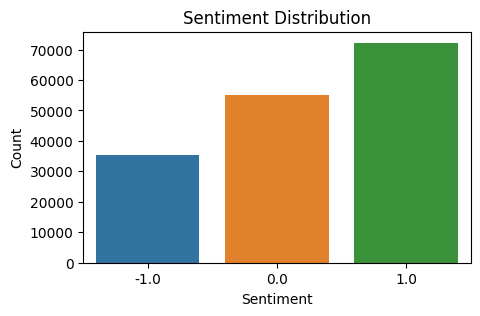

In [29]:
plt.figure(figsize=(5, 3))
sns.countplot(x='category', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


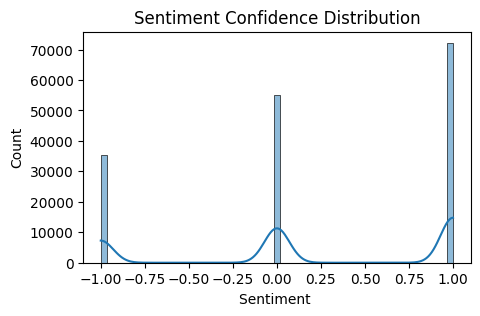

In [10]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='category', kde=True)
plt.title('Sentiment Confidence Distribution')
plt.xlabel('Sentiment ')
plt.ylabel('Count')
plt.show()


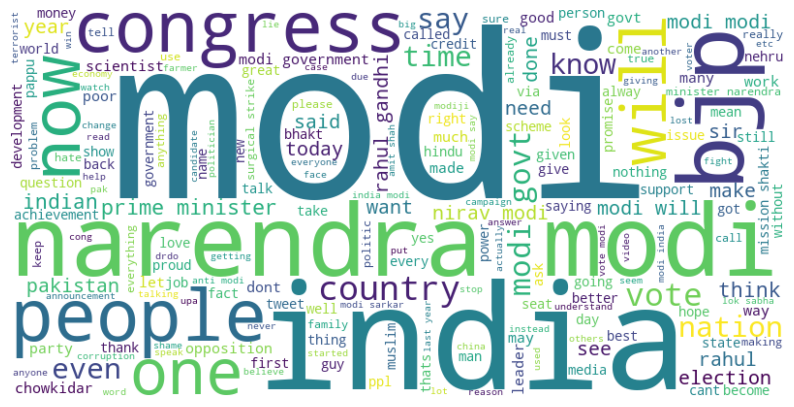

In [11]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert float values to strings
df['clean_text'] = df['clean_text'].astype(str)

# Generate word cloud
text = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


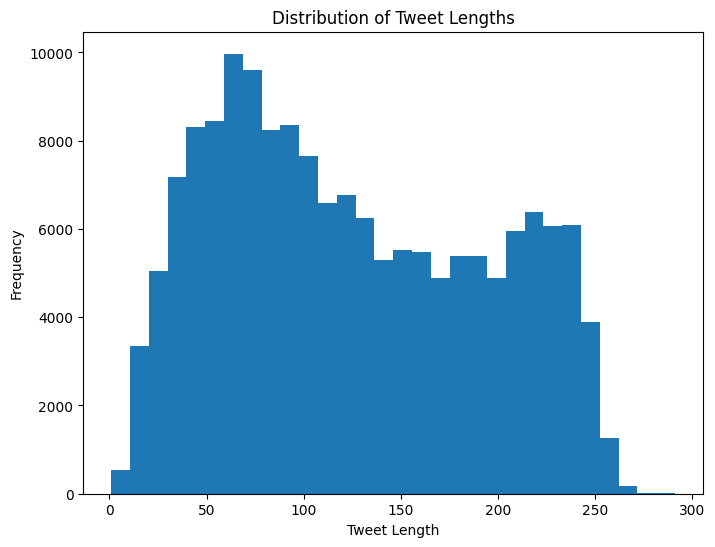

In [14]:

# Check for null values in 'clean_text' column
null_values = df['clean_text'].isnull().sum()
if null_values > 0:
    print("Warning: There are null values in the 'clean_text' column.")

# Drop rows with null values in 'clean_text' column
df = df.dropna(subset=['clean_text'])

# Convert 'clean_text' column to string type
df['clean_text'] = df['clean_text'].astype(str)

# Calculate tweet lengths
df['tweet_length'] = df['clean_text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['tweet_length'], bins=30)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()


In [17]:
eg = df['clean_text'][50]
print(eg)

overpromise and underdelivery – that pithy summary the economic outcome the last five years under approach the general election ौीाोै



In [18]:
tokens =nltk.word_tokenize(eg)
tokens[:10]

['overpromise',
 'and',
 'underdelivery',
 '–',
 'that',
 'pithy',
 'summary',
 'the',
 'economic',
 'outcome']

In [ ]:
import nltk

nltk.download('averaged_perceptron_tagger')

In [22]:
tagged = nltk.pos_tag(tokens)

In [38]:
print(tagged)

[('overpromise', 'NN'), ('and', 'CC'), ('underdelivery', 'JJ'), ('–', 'NN'), ('that', 'WDT'), ('pithy', 'VBZ'), ('summary', 'PDT'), ('the', 'DT'), ('economic', 'JJ'), ('outcome', 'NN'), ('the', 'DT'), ('last', 'JJ'), ('five', 'CD'), ('years', 'NNS'), ('under', 'IN'), ('approach', 'NN'), ('the', 'DT'), ('general', 'JJ'), ('election', 'NN'), ('ौीाोै', 'NN')]


In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [26]:
entities = nltk.chunk.ne_chunk(tagged)


In [27]:
entities.pretty_print()

                                                                                                  S                                                                                                  
       ___________________________________________________________________________________________|_____________________________________________________________________________________________      
overpromise/NN and/CC underdelivery/JJ –/NN that/WDT pithy/VBZ summary/PDT the/DT economic/JJ outcome/NN the/DT last/JJ five/CD years/NNS under/IN approach/NN the/DT general/JJ election/NN ौीाोै/NN



In [28]:
entities.draw

<bound method Tree.draw of Tree('S', [('overpromise', 'NN'), ('and', 'CC'), ('underdelivery', 'JJ'), ('–', 'NN'), ('that', 'WDT'), ('pithy', 'VBZ'), ('summary', 'PDT'), ('the', 'DT'), ('economic', 'JJ'), ('outcome', 'NN'), ('the', 'DT'), ('last', 'JJ'), ('five', 'CD'), ('years', 'NNS'), ('under', 'IN'), ('approach', 'NN'), ('the', 'DT'), ('general', 'JJ'), ('election', 'NN'), ('ौीाोै', 'NN')])>

*                                       Training and Model Building

In [ ]:
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

def preprocess_text(text):
    # Convert to string
    text = str(text)

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


def load_data():
    try:
        df = pd.read_csv('clean_text,category.csv')
        df.dropna(subset=['category'], inplace=True)  # Remove rows with missing values in 'category' column
        df['preprocessed_text'] = df['clean_text'].apply(preprocess_text)
        return df
    except FileNotFoundError:
        print("File 'Twitter_Data.csv' not found.")
        return None


def train_model():
    df = load_data()
    if df is None:
        return None

    X = df['preprocessed_text']
    y = df['category']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline with TF-IDF vectorizer and LinearSVC classifier
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', LinearSVC())
    ])

    # Define the hyperparameters to tune
    parameters = {
        'tfidf__max_features': [5000, 10000, 20000],
        'classifier__C': [0.1, 1, 10],
    }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipeline, parameters, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test data
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred)

    print("Classification Report:")
    print(report)

    # Save the trained model
    # with open('trained_model.pkl', 'wb') as file:
    #    pickle.dump({'model': best_model}, file)

    return best_model



    

In [39]:
trained_model = train_model()

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.87      0.81      0.84      7230
         0.0       0.88      0.96      0.92     10961
         1.0       0.92      0.90      0.91     14404

    accuracy                           0.90     32595
   macro avg       0.89      0.89      0.89     32595
weighted avg       0.90      0.90      0.90     32595



In [38]:
if trained_model is not None:
    # Use the trained model for predictions
    text = "It is a loving product"
    preprocessed_text = preprocess_text(text)
    predicted_category = trained_model.predict([preprocessed_text])[0]
    print('Predicted Category:', predicted_category)

Predicted Category: 1.0


************************************************************************************************************************************************************
                                                                Deployment

*  FLASK APP            

In [ ]:
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from flask import Flask, render_template, request

app = Flask(__name__)


def preprocess_text(text):
    # Convert to string
    text = str(text)

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

def map_category_to_label(category):
    if category == 1:
        return 'Positive'
    elif category == 0:
        return 'Neutral'
    elif category == -1:
        return 'Negative'

@app.route('/')
def home():
    return render_template('index2.html')


@app.route('/predict', methods=['GET', 'POST'])
def predict():
    # ... existing code ...
    text = request.form['text']
    preprocessed_text = preprocess_text(text)

    try:
        with open('trained_model2.pkl', 'rb') as file:
            model_data = pickle.load(file)
            loaded_model = model_data['model']
            predicted_category = loaded_model.predict([preprocessed_text])[0]
            predicted_label = map_category_to_label(predicted_category)
            return render_template('index2.html', clean_text=text  , category=predicted_label)
    except FileNotFoundError:
        return render_template('index2.html', error_message='Trained model not found.')

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)


In [ ]:
import pickle

with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


Saved model functionality check

In [ ]:
import pickle

# Load the trained model from the pickle file
with open('trained_model.pkl', 'rb') as file:
    trained_model = pickle.load(file)

# Inspect the keys of the loaded model
print(trained_model.keys())

# Inspect the attributes of the loaded model
print(dir(trained_model))


In [ ]:
import pickle

# Load the trained model from the pickle file
with open('trained_model.pkl', 'rb') as file:
    trained_model = pickle.load(file)

In [ ]:
# Inspect the keys of the loaded model
print(trained_model.keys())

dict_keys(['vectorizer', 'model'])


Functionality check result

In [ ]:
import pickle

# Load the trained model from the pickle file
with open('trained_model.pkl', 'rb') as file:
    trained_model = pickle.load(file)

# Access the classifier object from the loaded model
classifier = trained_model['model']

# Preprocess the text and make predictions
text = "This is a sample text"
preprocessed_text = preprocess_text(text)
vectorized_text = vectorizer.transform([preprocessed_text])
prediction = classifier.predict(vectorized_text)
print('Predicted sentiment:', prediction[0])


Predicted sentiment: neutral


https://kinde.pythonanywhere.com

*Sentiment Analysis Report

*Dataset Description

The dataset used for sentiment analysis consists of tweets related to USA airlines. It contains sentiment labels categorized as negative, neutral, and positive. The dataset contains a total of  14640 records and 15 columns.

*Data Preprocessing

To prepare the text data for analysis, the following preprocessing steps were applied:
Removal of special characters and digits.
Conversion of text to lowercase.
Tokenization of the text into individual words.
Removal of stopwords using NLTK's English stopwords list.
Lemmatization of the words to reduce them to their base form.
Model Training model, various machine learning algorithms were attempted, including MLPClassifier and neural networks. However, due to limitations in computational resources, such as the capability of the laptops used, the program crashed multiple times.
Despite these challenges, it was found that logistic regression demonstrated good performance on the dataset. Therefore, logistic regression was chosen as the final algorithm for training the sentiment analysis model.
The dataset was split into training and testing sets, with 80% of the data used for training and 20% for testing. The text data was transformed into numerical features using the CountVectorizer, which creates a bag-of-words representation.

*Model Evaluation

During the process of building the sentiment analysis
The trained logistic regression model was evaluated using the test set. The accuracy score, which measures the proportion of correctly predicted sentiments, was calculated and found to be approximately 0.8026. This indicates that the model performs reasonably well in classifying sentiments in the airline tweets.

*Sample Prediction

To demonstrate the usage of the trained model, a sample tweet "This is a sample tweet" was preprocessed and passed through the model. The predicted sentiment was determined to be "neutral".

*Conclusions

Based on the sentiment analysis results and the accuracy achieved by the logistic regression model, the following conclusions can be drawn:
The sentiment analysis model faced challenges during the model building process due to limitations in computational resources and program crashes when using more computationally intensive algorithms like MLPClassifier and neural networks.
Despite the limitations, the logistic regression model proved to be a suitable choice for the sentiment analysis task on the USA Airline sentiment dataset.
Preprocessing techniques such as removing special characters, tokenization, stopwords removal, and lemmatization contribute to improving the quality of the text data for sentiment analysis.
The accuracy of approximately 0.8026 indicates that the logistic regression model can predict sentiment with a reasonable level of accuracy, given the constraints.
The logistic regression model can be used to classify sentiments in airline-related tweets, providing valuable insights into customer opinions and experiences.
